In [1]:
import os
os.environ["OPENBLAS_CORETYPE"] ="Skylake"
os.getenv("OPENBLAS_CORETYPE")

'Skylake'

In [2]:
import numpy as np

# sudo apt install libgl1-mesa-glx
import cv2
from PIL import Image

### Tworzenie i otwieranie obrazów
Opisane na podstawie: [OpenCV: podstawy](https://aivision.pl/opencv-basics/)

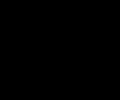

In [3]:
img = np.zeros((100,120,3), dtype='uint8')
Image.fromarray(img)

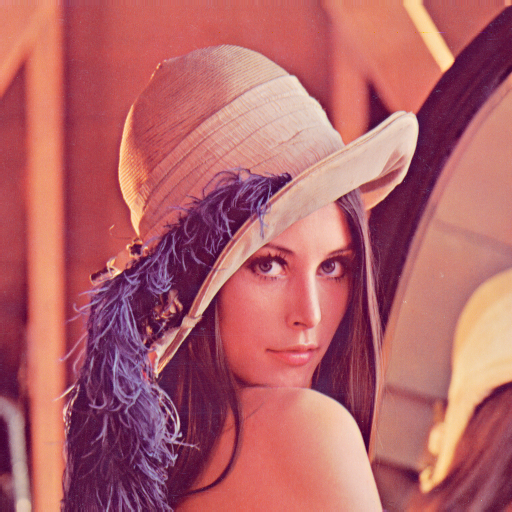

In [4]:
img = cv2.imread('Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # img = img[...,::-1]
Image.fromarray(img)

In [5]:
(h, w, d) = img.shape
print(f"Image: width={w}px, height={h}px, depth={d}")

Image: width=512px, height=512px, depth=3


In [6]:
(B, G, R) = img[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=120, G=140, B=232


Pixel located at x=50 and y=100

Keep in mind that the height is the number of rows and the width is the number of columns.

### Przycinanie

Składnia:
```python
image[startY:endY, startX:endX]
```

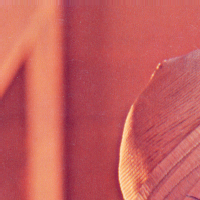

In [7]:
img = img[0:200, 0:200, :]
Image.fromarray(img)

### Rysowanie prostych kształtów

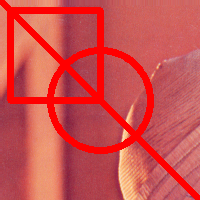

In [8]:
cv2.line(img, (0,0), (200,200), (255,0,0), 5)
cv2.circle(img, (100,100), 50, (255,0,0), 5)
cv2.rectangle(img, (10,10), (100,100), (255,0,0), 5 )
Image.fromarray(img)

### Pisanie tekstu

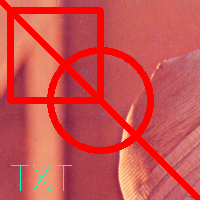

In [9]:
cv2.putText(img, "TXT", (10,190), # lewy dolny pkt
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,255,200))
Image.fromarray(img)

## Liczenie obiektów

Opisane na podstawie: [OpenCV Tutorial: Counting objects](https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/#attachment_7663)

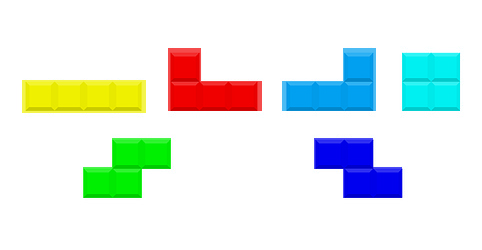

In [10]:
image = cv2.imread("tetris_blocks.png")
Image.fromarray(image)

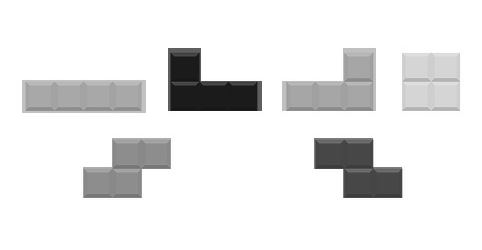

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

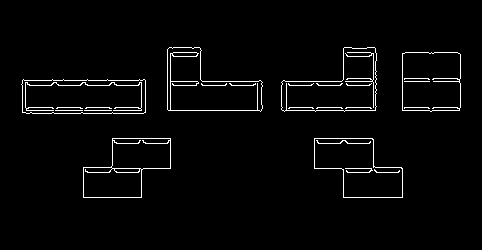

In [12]:
edged = cv2.Canny(gray, 30, 150, 3) # Canny Edge Detector
Image.fromarray(edged)

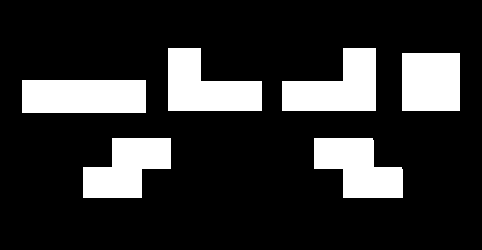

In [13]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
Image.fromarray(thresh)

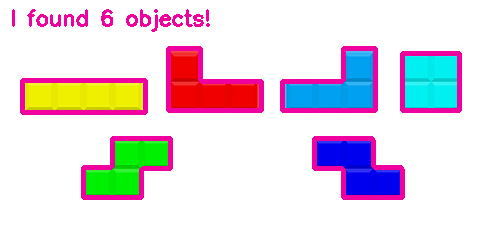

In [14]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0]
output = image.copy()

for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)    
    
Image.fromarray(output)

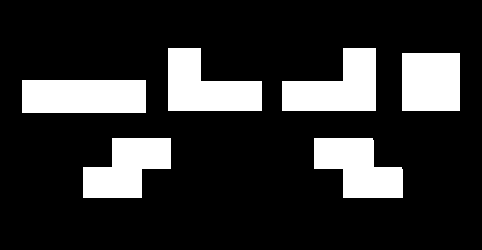

In [18]:
mask = thresh.copy()

# Erode & dilate Example
mask = cv2.erode(mask, None, iterations=5)
mask = cv2.dilate(mask, None, iterations=5)
Image.fromarray(mask)

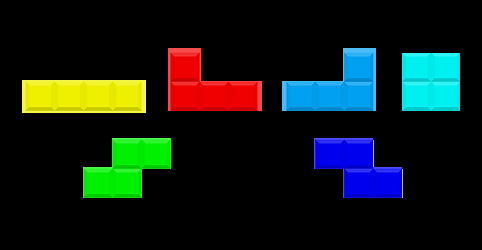

In [19]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
Image.fromarray(output)

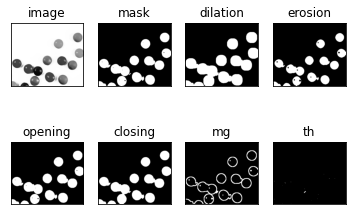

In [17]:
from matplotlib import pyplot as plt

img = cv2.imread('smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

https://www.javatpoint.com/opencv-basic-operation-on-images

https://medium.com/@kmtsandeepanie/basic-operations-on-images-using-opencv-c7de77cc38a3

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html
    